In [1]:
# This is an example of loading a data file and making a light curve and spectrum.

import numpy as np
import pickle
import shelve
#import matplotlib
#matplotlib.use('PS')
from matplotlib import pyplot as plt
from scipy import optimize
from scipy import integrate
from scipy import interpolate
from global_var import sysvars as gv
import integrate_total_power_interp as itpi

savefile = './afterglow_sych_spectrum.GW170817.bestfit.p'

data_in = open(savefile, 'rb')
data = pickle.load(data_in)
data_in.close()

print('data loaded')

# The datafile with name savefile is now loaded.


data loaded


In [2]:
# This calls the function 'integrate_total_power_interp', which uses the datafile to 
# create arrays that store brightness seen at Earth at different wavelengths:
# jy - brightness at all times 'time' and all frequencies 'freq', in units of Janskys
# radio - brightness at all times 'time' interpolated to frequencies in radio_f in units of Janskys
# xray - total brightness at all times 'time' in xrays between xray_min (keV) and xray_max (keV) in units of erg/cm^2/s
# optical - total brightness at all times 'time' in R-band optical in units of magnitude.
# optical_AB - same as optical but in AB magnitude system.

h = 4.135667662e-15     #eV/s
to_ev = 4.1356691e-15 /2/np.pi  #convert omega(frequency) to eV
Mpc = 3.08e24  # Mpc in cm


time='0'


z_origional = 0.047 # Redshift everything was run at

# For GW170817:
# Cosmological Redshift from Hjorth et al., 2017, ApJL, 848, L31
z = 0.0098
#For Ho = 69.6, OmegaM = 0.286, Omegavac = 0.714, z = 0.356, using Ned Wright's cosmology calculator
#dl = 42.5 # Mpc
#For Ho = 73.24, OmegaM = 0.286, Omegavac = 0.714, z = 0.356, using Ned Wright's cosmology calculator.  
#This is the local Ho used by Hjorth et al. 2017, from Riess et al. 2016
dl = 40.4

#time_input='0'
#time_input = np.logspace(np.log10(0.1),np.log10(1000),161)*3600*24.


#radio_f=np.array([6.5e8,1.e9,3.e9,2.418e17])*h/(to_ev*2*np.pi)
radio_f=np.array([6.5e8,1.e9,3.e9,6.e9,1.e11,5.06e14,2.418e17,1.e22])*h/(to_ev*2*np.pi)



radio,xray,optical,optical_ab,time,freq, \
jy, time_origional, glow \
= itpi.integrate_total_power_interp(savefile, radio_f, z, z_origional, dl, \
                                    xray_min=0.3, xray_max=10.0, optical_f='0', time=time)
print(radio_f[3])

[6.49999774e+08 9.99999652e+08 2.99999896e+09 5.99999791e+09
 9.99999652e+10 5.05999824e+14 2.41799916e+17 9.99999652e+21]
[ 0.24691358  0.74074074  1.2345679   1.72839506  2.22222222  2.71604938
  3.20987654  3.7037037   4.19753086  4.69135802  5.18518519  5.67901235
  6.17283951  6.66666667  7.16049383  7.65432099  8.14814815  8.64197531
  9.13580247  9.62962963 10.12345679 10.61728395 11.11111111 11.60493827
 12.09876543 12.59259259 13.08641975 13.08641975 12.59259259 12.09876543
 11.60493827 11.11111111 10.61728395 10.12345679  9.62962963  9.13580247
  8.64197531  8.14814815  7.65432099  7.16049383  6.66666667  6.17283951
  5.67901235  5.18518519  4.69135802  4.19753086  3.7037037   3.20987654
  2.71604938  2.22222222  1.72839506  1.2345679   0.74074074  0.24691358]
DONE WITH INTERPOLATION!!!!
5999997913.75959


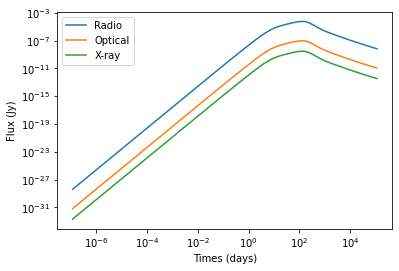

In [3]:
# Plot the light curve (brightness (JY) vs. time (s)) at 6 GHz, r-band, and 1 keV

plt.plot(time/3600/24,radio[:,3],label='Radio')
plt.plot(time/3600/24,radio[:,5],label='Optical')
plt.plot(time/3600/24,radio[:,6],label='X-ray')
plt.legend()

#plt.xlim([0.1,10000])
#plt.ylim([1.e-15,1.e-3])

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Times (days)')
plt.ylabel('Flux (Jy)')

plt.show()


Spectrum at 1000000.0 s = 11.574074074074074 days


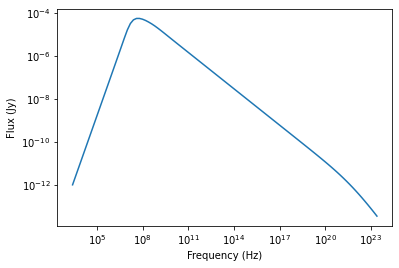

In [4]:
# Plots the spectrum (brightness (Jy) vs. freqeuncy (Hz)) for time[54] = 1e7s ~ 116 days

time_i = 48

print('Spectrum at',time[time_i],'s =',time[time_i]/3600/24,'days')

plt.plot(freq,jy[time_i,:])

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Flux (Jy)')

plt.show()
